# Hierachical Clustering

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../../Datasets/OnlineRetail.csv", encoding='ISO-8859-1')

In [3]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [4]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


### LabelEncoder for country name

In [5]:
print(df['Country'].unique())

['United Kingdom' 'France' 'Australia' 'Netherlands' 'Germany' 'Norway'
 'EIRE' 'Switzerland' 'Spain' 'Poland' 'Portugal' 'Italy' 'Belgium'
 'Lithuania' 'Japan' 'Iceland' 'Channel Islands' 'Denmark' 'Cyprus'
 'Sweden' 'Austria' 'Israel' 'Finland' 'Bahrain' 'Greece' 'Hong Kong'
 'Singapore' 'Lebanon' 'United Arab Emirates' 'Saudi Arabia'
 'Czech Republic' 'Canada' 'Unspecified' 'Brazil' 'USA'
 'European Community' 'Malta' 'RSA']


In [6]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df['country_encoded'] = encoder.fit_transform(df['Country'])

In [7]:
df.drop(columns=['InvoiceNo', 'StockCode', 'InvoiceDate', 'Country', 'Description', 'CustomerID'], inplace=True)

In [8]:
df.head()

,Quantity,UnitPrice,country_encoded
0,6,2.55,36
1,6,3.39,36
2,8,2.75,36
3,6,3.39,36
4,6,3.39,36


In [9]:
df.isnull().sum()

Quantity           0
UnitPrice          0
country_encoded    0
dtype: int64

In [10]:
# Normalize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df)

In [43]:
# Reduce data size

sample_data = df.sample(n=10000, random_state=42)

In [44]:
sample_data.shape

(10000, 3)

### Plot dendogram

In [45]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [46]:
# Compute linkage matrix
Z = linkage(sample_data, method='ward')

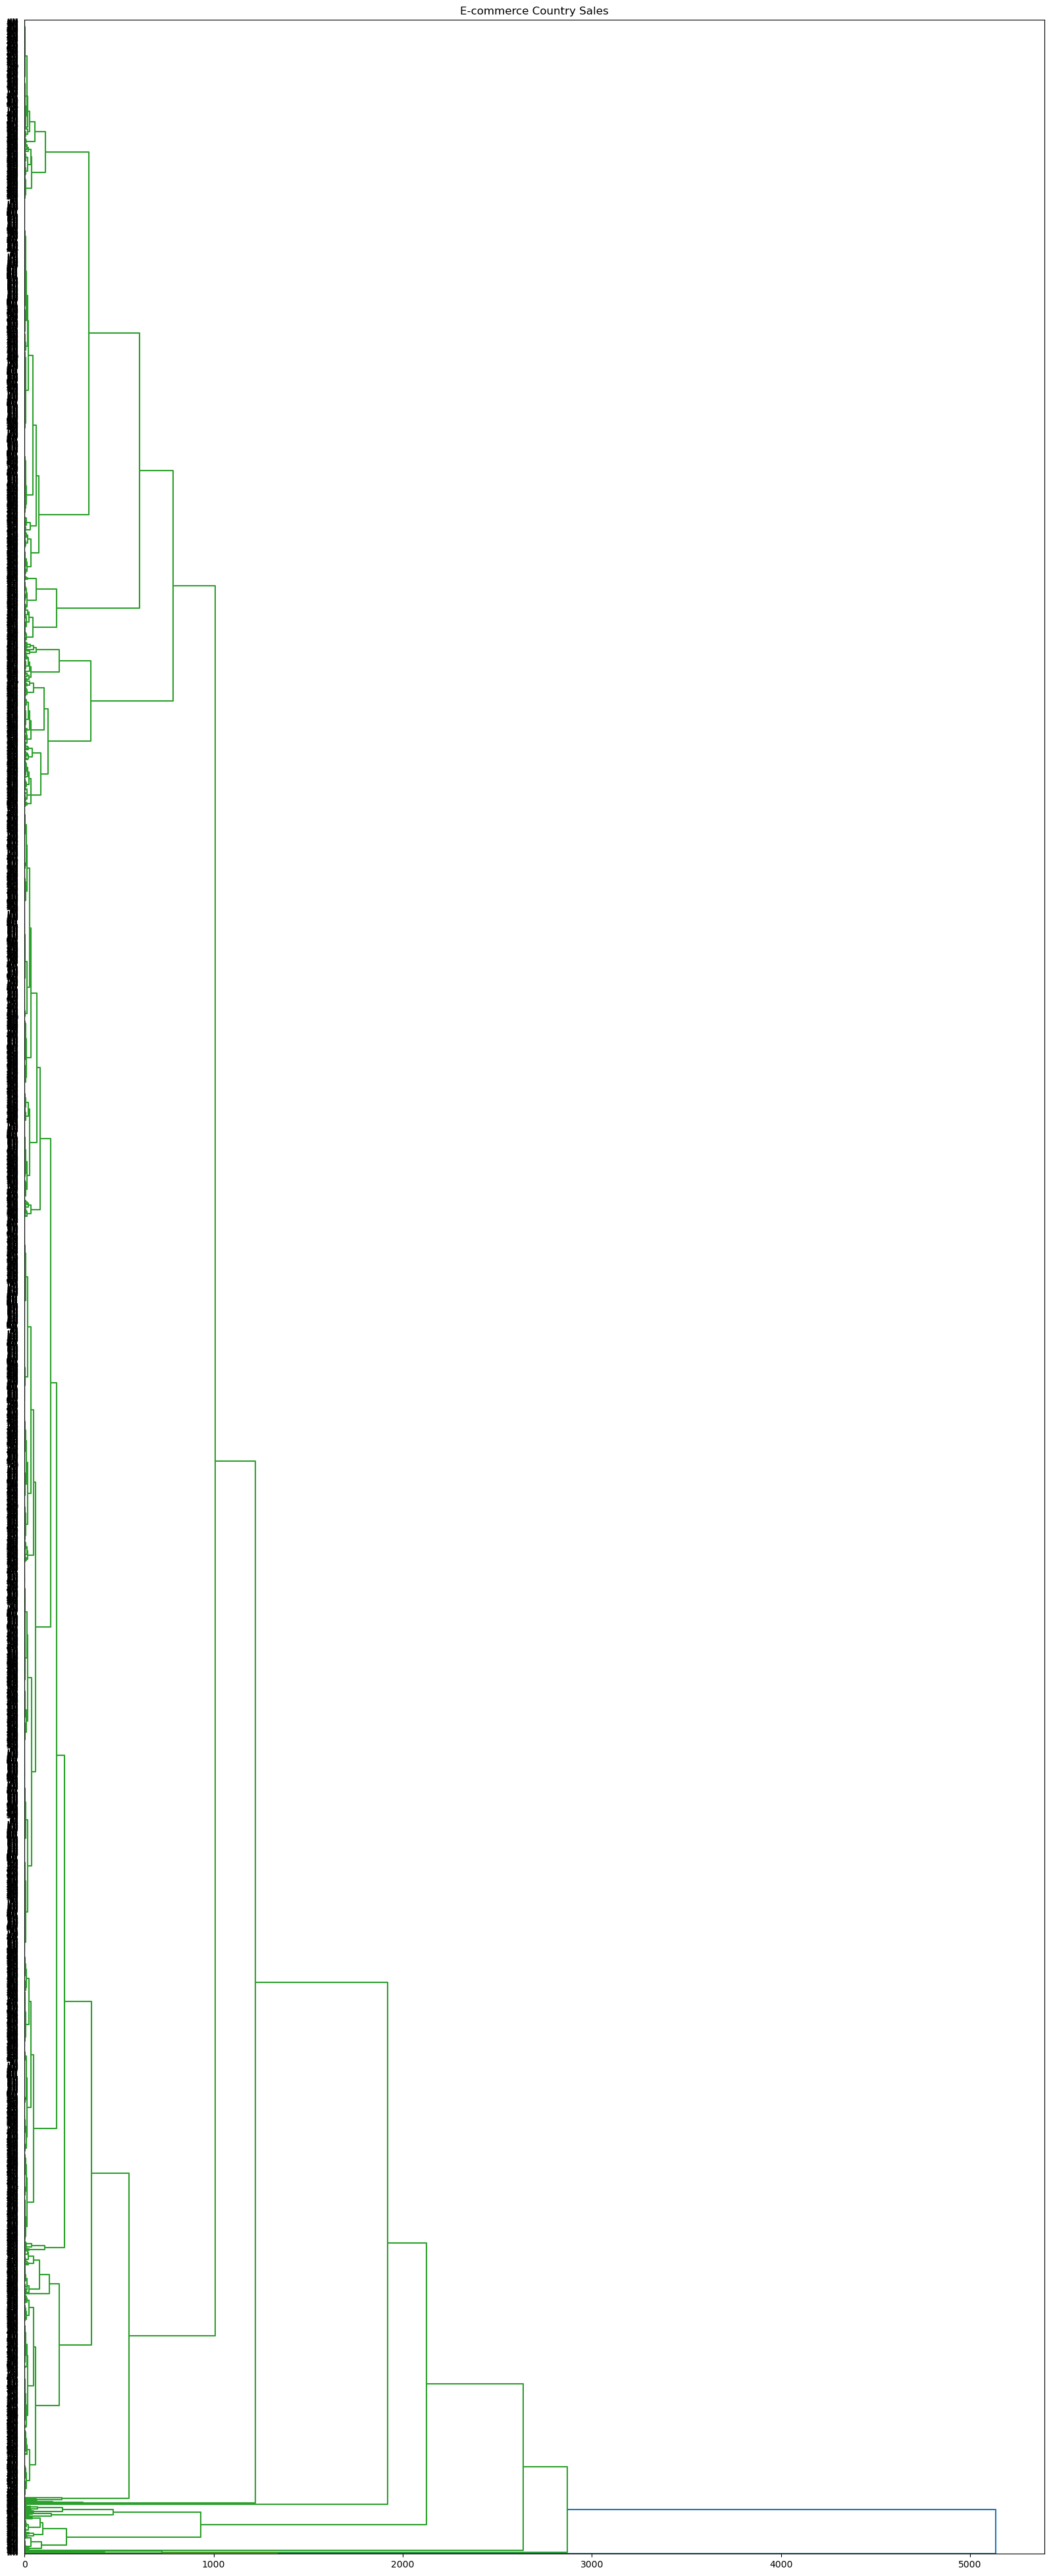

In [47]:
plt.figure(figsize=(20,50))
plt.title("E-commerce Country Sales")
dend = dendrogram(Z, orientation='right')
plt.show()

### Agglomerative Clustering

In [48]:
from sklearn.cluster import AgglomerativeClustering

agcl = AgglomerativeClustering(n_clusters=6, metric='euclidean', linkage='ward')

In [49]:
labels = agcl.fit_predict(sample_data)

In [50]:
labels.shape

(10000,)

In [51]:
sample_data.shape

(10000, 3)

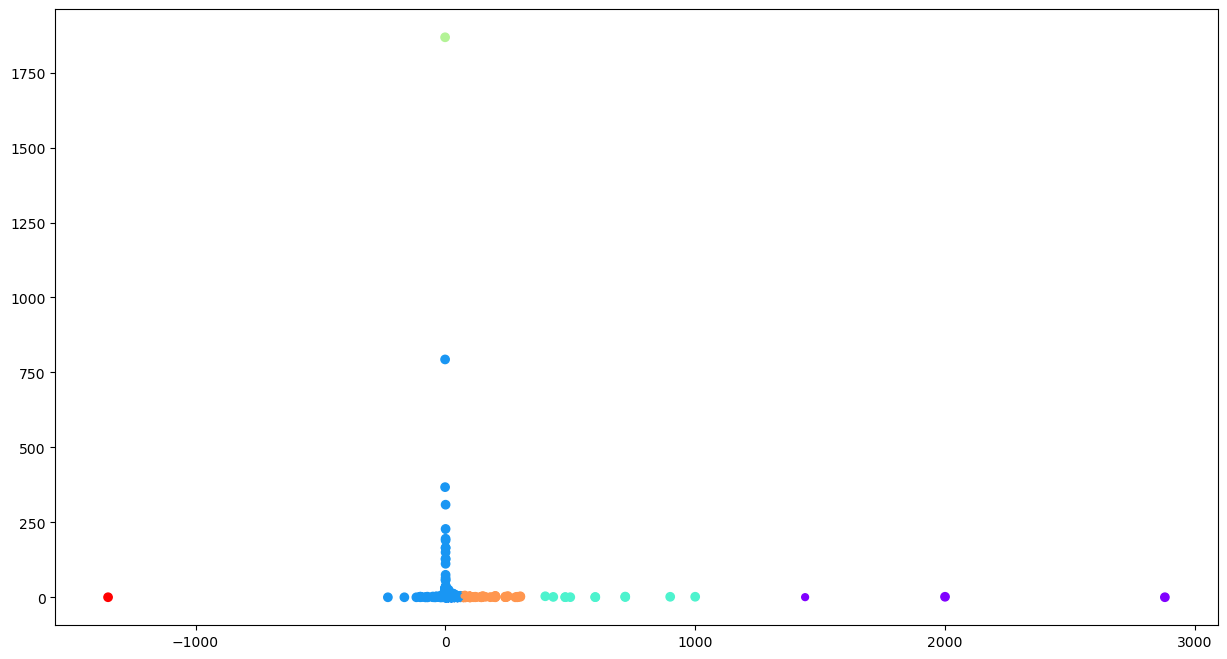

In [55]:
plt.figure(figsize=(15,8))
plt.scatter(sample_data.iloc[:, 0], sample_data.iloc[:, 1], s=sample_data.iloc[:, 2], c=labels, cmap='rainbow')